In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
tf.python.control_flow_ops = tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
train=pd.read_csv('train.csv',encoding='latin-1')
datos=pd.read_csv('test.csv',encoding='latin-1')

In [ ]:
#entrenar=pd.read_csv('entrenar.csv')
#testear=pd.read_csv('testear.csv')

In [ ]:
def tokenizarTexto(x):
  x=x.casefold()
  x=re.sub(r'http\S*', '',x)
  x=re.sub(r'[^a-z\s]', '',x)
  return x

In [ ]:
X = []
sentences = list(train['text'])
for sen in sentences:
    X.append(tokenizarTexto(sen))

In [ ]:
X[8]

'theres an emergency evacuation happening now in the building across the street'

In [ ]:
y=train['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
"""model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))"""

"model = Sequential()\nembedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)\nmodel.add(embedding_layer)\n\nmodel.add(Flatten())\nmodel.add(Dense(1, activation='sigmoid'))"

In [ ]:
"""model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(128, 5, activation='selu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='selu'))
model.add(Dense(1, activation='sigmoid'))"""

"model = Sequential()\n\nembedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)\nmodel.add(embedding_layer)\nmodel.add(Conv1D(128, 5, activation='selu'))\nmodel.add(GlobalMaxPooling1D())\nmodel.add(Dense(64, activation='selu'))\nmodel.add(Dense(1, activation='sigmoid'))"

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1471500   
_________________________________________________________________
lstm (LSTM)                  (None, 100, 128)          117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,642,381
Trainable params: 170,881
Non-trainable params: 1,471,500
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=3, verbose=1, validation_split=0.2)

Epoch 1/20
20/20 [==============================] - 16s 819ms/step - loss: 0.6848 - acc: 0.5745 - val_loss: 0.6864 - val_acc: 0.5616
Epoch 2/20
20/20 [==============================] - 16s 780ms/step - loss: 0.6847 - acc: 0.5714 - val_loss: 0.6857 - val_acc: 0.5616
Epoch 3/20
20/20 [==============================] - 16s 780ms/step - loss: 0.6838 - acc: 0.5714 - val_loss: 0.6857 - val_acc: 0.5616
Epoch 4/20
20/20 [==============================] - 16s 780ms/step - loss: 0.6831 - acc: 0.5714 - val_loss: 0.6856 - val_acc: 0.5616
Epoch 5/20
20/20 [==============================] - 16s 778ms/step - loss: 0.6838 - acc: 0.5714 - val_loss: 0.6857 - val_acc: 0.5616
Epoch 6/20
20/20 [==============================] - 16s 778ms/step - loss: 0.6847 - acc: 0.5714 - val_loss: 0.6856 - val_acc: 0.5616
Epoch 7/20
20/20 [==============================] - 16s 781ms/step - loss: 0.6831 - acc: 0.5714 - val_loss: 0.6859 - val_acc: 0.5616
Epoch 8/20
20/20 [==============================] - 16s 779ms/step - 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

48/48 [==============================] - 2s 41ms/step - loss: 0.6822 - acc: 0.5739


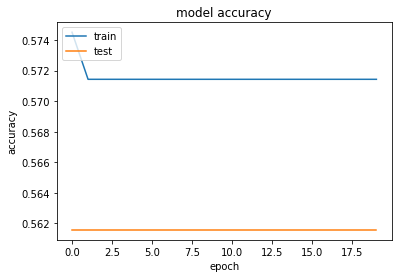

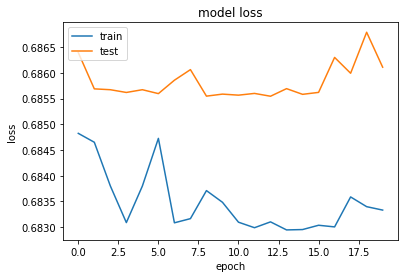

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
X=[]
sentences = list(datos['text'])
for sen in sentences:
    X.append(tokenizarTexto(sen))

In [ ]:
tokenizer.fit_on_texts(X)

X_test = tokenizer.texts_to_sequences(X)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
lista=model.predict(X_test)

In [ ]:
lista = (lista>0.5)*1
predictions = pd.DataFrame()
predictions['id']=datos['id']
predictions['target']=lista
predictions.head()
predictions.to_csv('resultadosCNN.csv',index=False)

In [ ]:
#!kaggle competitions submit -c nlp-getting-started -f resultadosCNN.csv -m "Nuevo intento"